# TVA-TOJ script collection and explanation

## Abstract
This juypter notebook contains a set of tools and explanations to analyse temporal-order judgments (TOJ; for a review, see Spence & Parise, 2010) with Bundesen's theory of visual attention (TVA; Bundesen, 1990). This is done, by deriving a psychometric function from the fromal TVA model. This function is then implemented in a Bayesian hierarchical graphical model. The model in turn can be used for parameter estimation (most common), model comparison or data prediction. 

According to TVA, the data of TOJs can be explained in terms of the processing speed¹ of both events for which the temporal order has to be judged. Indeed, the psychometric function can be parametrized with $v_p$ and $v_r$ which are the processing rates of the probe and reference stimulus, respectively. For reporting results, the derived measured visual processing capacity, C, and attentional weight, w, are used because these show directly how attention is distributed, w, and how much capacity for visual processing was availably, C.

This script deals particularly with implementing the Bayesian data analysis for a TVA-based interpretation of TOJ. For an introduction, see Kruschke (2011). For estimation, a hierarchical graphical model an suggetsed priors are provided for desings containing conditions, participants. It is expacted, that the user has some TOJ data, for which we assume simply formatted text files. Thechnically, it is also possible to simulate data and compare different models, e.g., based on different psychometric functions.

The following material constructed to a) make reported analysis better comprehensible, b) help understanding the technicalities of Bayesian inference c) provide an easy means to concuct TVA-based TOJ analysis d) be copyed and extended according to personal need.


¹technically a rate (events per time) is used in TVA but the rate is equivalent to a speed (time per event) so that the terms are often used interchangably

## TVA-based psychometric function for TOJ

TVA-based analysis of TOJ provides a psychometric functon that is based on a formal theroy of attention. This it models the logic of the cognitive process assumed by TVA to happen (Tünnermann, Petersen, Scharlau, 2015). In contrast, other commonly used functions (Wichmann & Hill, 2001; Kuss, Jäkel & Wichmann, 2005) merely describe the shape of the data well. Taagepera (2008) distinguishes these two approaches to modeling by calling them logical modeling and descriptive modeling, respectively, while making a case for the need of logical modeling in social sciences. In short, logical models are better for explanation and prediction of the data but require more thought about the underlaying mechanisms.

### Design and data of TOJ

The design of TOJ experiment is characterized by two stimuli, probe and reference. The names stem from the idea that reference retains its properties throughout the experiment whereas probe is used for attentional manipulations. It is imporant to note that the TOJ does not have to be implemented by the onset of these stimuli, e.g, for salience resarch a brief flicker of the stimuli is a better choice for the signals for which the order has to be judged (Krüger, Tünnermann & Scharlau, 2016). 

The events to be judged are separated by a stimulus onset asynchrony (SOA) which varies arround the point of objective simultaneity in several steps, e.g., -100 ms, -50 ms, 0 ms, 50 ms and 100 ms. The SOAs are repeated, e.g., 20 times. Additonally, there are multiple conditions and participants.  

For this script, we expect the data to be available in a csv (comma separated values) text file looking like this:

Condition,SOA,Count,Repetitions,Relative

1,-100,115,120,0.97

1,-50,116,120,0.97

1,0,85,120,0.70

1,50,9,120,0.07

1,100,4,120,0.04

2,-100,115,120,0.97

...

Where *Relative* is the *Count* / *Repetitions*. Also, *Condition* can be numeric or a name. The typical pattern in the data can be described as sigmoid, S-shaped, function: The larger the SOA, the less mistakes are made. So, roughly speaking, if you are good (few mistakes), the data will have a steep slope. Because of attention, probe may however be perceived earlier. This is neither caused by an accerlation of probe, nor by a decelleration of reference but rather a redistributon of processing speed (Weiß & Scharlau, 2011). This is often measured by the point of subjective simultenaiety (PSS; e.g., Spence & Parise, 2010). If probe has a processing advantage over reference because of attention, than it is possible to infer this advantage in terms of milliseconds. Given a psychometric function to fit to the data, you can infer how much millisecond later probe has to be shown so that it is reported first as often as reference (PSS or the point at which the uncertainty of order is largest, which is the chance level of .5). For a visual example see the Psychometric function in the following section.

### Bayesian statistics and data format

Bayesian statistics can deal with a lot of situations that would break the assumptions required for other methods (see, e.g., Dienes, 2011). For this analysis it is important to know that it is not required to have the same number of repetitions per SOA or per Participant. These numbers are allowed (technically speaking) to differ.  

### Origin of TVA-based psychometric function

Usually, a psychometric function is fitted to the data of the TOJ to infer more or less meaningful parameters. An example, outside of TVA is the PSS and a parameter for the slope of the function (Wichmann & Hill, 2001; Kuss, Jäkel & Wichmann, 2005).

TVA models visual recognition and selection. Since the reseach by Shibuya and Bundesen (1988), a fixed-capacity independent race model (FRIM) has been the basis for formal TVA. While sounding very technical, its core ideas are simple: There is a limited capacity, that is distributed to stimuli in the visual field. 

The capacity reveived by a stimulus determines its processing rate that is roughly equivalent to the speed of processing. Depending on its rate, the stimulus' processing more or less likely to finish its processing earlier than other stimuli. The stimuli that finish first are granted access to the resources for conscious  representation and are thus reportable afterward. An apt anaology is a horse race. The following figure sketches this process.

<img src="./tvatoj-script/tva-firm-example.png">

The arrival in visual short-term memory (VSTM) is---maybe contrary to your expecation---not modeled as the accumulation of evidence. Instead, TVA merely model when processing is finished. This is done by a hazard rate so that a graph can depict the probability of a stimulus being already encoded to VSTM as in the following image. 

<img src="./tvatoj-script/vstm-arrival.png">

In line with the idea of attention being a form of biased competetion (Desimone & Duncan, 1995), the capacity is not necessarily distributed evenly. Initially, TVA modeled the evidence of a stimulus belonging to a category as well as the importance of these categories (Bundesen 1990). Newer developments also include salience (Nordfang, Dyrholm & Bundesen, 2013) or location specific attention (Nordfang, Staugaard & Bundesen, 2017). For a formal description, see the respective publikation.

When modeling TOJ, there are only two relevant stimuli, also both are equally important to the task so that not all TVA parameters are not needed for modeling (this is also the reason why the previous example only contained two stimuli). On one hand, this leads to a simpler model; On the other hand, not all parameters a reasearcher may be intertested in can be infered from the TOJ model. The following image shows how judgments in the TOJ design may arise from two stimuli processed according to the FIRM assumption. 

<img src="./tvatoj-script/cogmod.png">

Formally, the curve arises from the equations below. In the equations, you can see the exponentially distributed arrivel times that depend on $v_p$ and $v_r$ (Tünnermann, Petersen & Scharlau, 2015):

$$
P_p(v_p, v_r, \Delta t) = 1-e^{v_p |\Delta t|}+e^{v_p |\Delta t|}\left(\frac{v_p}{v_p+v_r}\right) \quad \text{for } \Delta t < 0
$$

$$ P_p(v_p, v_r, \Delta t) = e^{v_r |\Delta t|}\left(\frac{v_p}{v_p+v_r}\right) \quad \text{for } \Delta t \geq 0 $$

## Interactive Explanation of TVA-TOJ psychometric function

In [2]:
%matplotlib inline
from ipywidgets import interact, interactive, IntSlider, FloatSlider;
import numpy as np
from matplotlib.pylab import plt

<img src="./tvatoj-script/cogmod.png">

Let's set our SOA range

In [3]:
SOAs = range(-150,150+1,1)

Let's define the psychometric function:

In [4]:
def pf_tva_simple_toj(SOA, vp, vr):
    SOA = np.array(SOA)
    left = (1-np.exp(-vp*abs(SOA))) + np.exp(-vp*abs(SOA)) * vp/(vp+vr)
    right = np.exp(-vr*abs(SOA))*vp/(vp+vr)
    return ((SOA<=0)*left  + (SOA>0)*right)

The next block defines a function to plot the psychometric function above

In [5]:
def plot(vp,vr,**kwargs):
    plt.plot(SOAs, pf_tva_simple_toj(SOAs,vp,vr),label='p("probe first")')
    plt.ylabel('p("probe first")')
    plt.xlabel('SOA (ms)')
    axes = plt.gca()
    axes.set_xlim([min(SOAs),max(SOAs)])
    axes.set_ylim([0,1])
    soa = kwargs.get('soa', None)
    # for marking an soa (needed later)
    if 'soa' in kwargs:
        soa = kwargs['soa']
        plt.axvline(x=soa*1000,color='gray')
    plt.title('Temporal-order judgment')
    plt.legend()

The following *interact* function should show sliders to adjust the values of the function's parameters. This is purely for your convenience and can be circumvented by simply calling *plot* with the parameters you would like to see visualized.

I prefer the sliders for the quick feedback, however. If these don't show, see https://stackoverflow.com/questions/36351109/ipython-notebook-ipywidgets-does-not-show

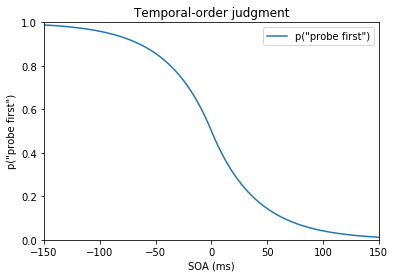

In [6]:
interact(plot, vp=(0,0.050,0.001), vr=(0,0.050,0.001)); # vr, vp = rate in m hz (millihertz)

### Plot functions for encoding rates

In [7]:
def hazardfunct(vp, vr, soa):
    t = np.arange(0.0, 1, 0.01)
    yp = 1-np.exp(-vp*(t))
    yr = 1-np.exp(-vr*(t))

    plt.plot(t*1000+soa*1000 - 0, yp, label='$v_p$ = {0:.2f}'.format(vp), color = 'red')
    plt.plot(t*1000          - 0, yr, label='$v_r$ = {0:.2f}'.format(vr), color = 'skyblue' )
    plt.ylabel('p("already encoded")')
    plt.xlabel('time relative to SOA 0 (ms)')
    axes = plt.gca()
    axes.set_ylim([0, 1])
    axes.set_xlim([-150 - 0, 150 - 0])
    plt.legend(loc=2)

In [8]:
def plothazfct(vp, vr, soa):
    plt.figure(1)
    plt.subplot(211)
    plot(vp,vr,soa=soa)
    plt.subplot(212)
    hazardfunct(vp*1000,vr*1000,soa)

### Visualization of TOJ depending on TVA rates


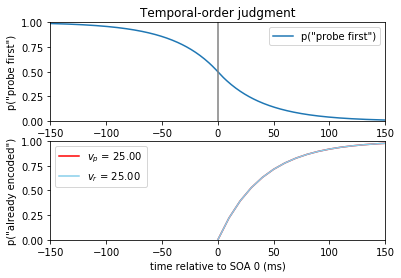

In [9]:
interact(plothazfct, vp=(0,0.050,0.001), vr=(0,0.050,0.001), soa=(-0.1,0.1,0.01));

### TOJ curve can be reparametrized using $\kappa$, $C$ instead of $v_p$, $v_r$ 

$$ v_p = \frac{\kappa_p}{\kappa_p + 1} \cdot C $$

$$v_r = \frac{1}{\kappa_p + 1} \cdot C$$

### Python functions for TOJ $\kappa$, $C$ parametrization and their ploting


In [10]:
def ckplot(C,kappa, soa):
    vp = (kappa/(1+kappa))*C
    vr = (1/(1+kappa))*C
    plot(vp,vr,soa=soa)
    plt.legend()

In [11]:
def ckrateplot(C,kappa, soa):
    vp = (kappa/(1+kappa))*C
    vr = (1/(1+kappa))*C
    plt.figure(1)
    plt.subplot(211)
    ckplot(C,kappa,soa)
    plt.subplot(212)
    hazardfunct(vp*1000,vr*1000,soa)
    

## How saliene affects $\kappa$

The initial cluttered display is presentet $150$ ms before the temporal-order judgment. After this time the influence from feature contrasts is strong (e.g. Dombrowe, Olivers, & Donk, 2010). Depending on th experimental condition the probe stimulus may or may not be salient. However, slience is not beneficial for the task of judging the temporal order of the two flicker events. The positions left and right of the fixation mark never change. Therefore salience is not needed to "search" the relevant stimuli.

<img src="./tvatoj-script/procedure-v3-rel.png">

### Example: Neutral condition $0^\circ$ orientation contrast

<img src="./tvatoj-script/neutral.gif">

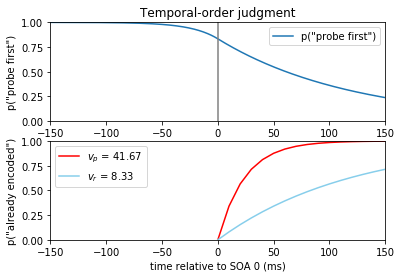

In [12]:
interact(ckrateplot, C=(0.001,0.1,0.001), kappa=(1,10,0.1), soa=(-0.100, 0.100, 0.01));

### Example: Experimental condition $90^\circ$ orientation contrast ($\kappa = 2.1$)

<img src="./tvatoj-script/experimental.gif">

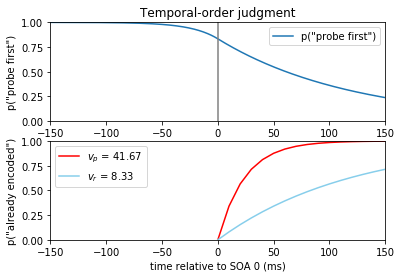

In [13]:
interact(ckrateplot, C=(0.001,0.1,0.001), kappa=(1,10,0.1), soa=(-0.100, 0.100, 0.01));

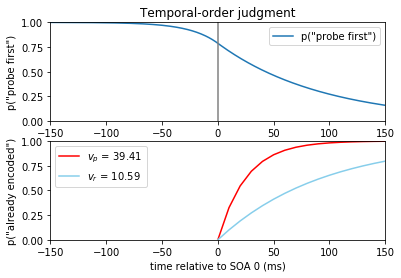

In [14]:
def powerlawmodelplot(deltao,deltal, c, soa):
    ko = 0.08
    no = 0.63
    kl = 0.22
    nl = 0.66
    k = 1+ko*pow(deltao,no)+kl*pow(deltal,nl)
    ckrateplot(c,k, soa)
interact(powerlawmodelplot, deltao=(0,90,1), deltal=(0,50,1), c=(0.001,0.1,0.001), soa=(-0.100, 0.100, 0.01));

# The Stats

## Loading and visualizing the data

In python, table-like data can be handled well by pandas data frames. So, first, we load the data to a pandas data frame. If the TOJ data is not yet in the format described under "Design and data of TOJ", you may have to wirte a script to convert the data into the required format. Afterward, matplotlib is used for plotting all participants data.

In [40]:
# shows graphics directly in jupyter notebook
%matplotlib inline
import glob # find, get files
import numpy as np
import pandas as pd # pandas data frames
from matplotlib.pylab import plt

In [41]:
std_toj_path = './std-toj'
extension = 'csv'

In [42]:
std_toj_files = sorted(
    glob.glob(std_toj_path+"/*"+extension))

In [43]:
# add all files information temporarily to a list
temp_list = []

for participant_number, filename in enumerate(std_toj_files):
    temp_df = pd.read_csv(filename, index_col=None, header=0)
    # participant numbers is assigned for later statistics
    temp_df['Participant'] = [participant_number]*len(temp_df)
    # file name is kept to track odd data
    temp_df['File'] = [filename]*len(temp_df)
    temp_list.append(temp_df)

# concatinate all info into one pandas data frame    
all_data = pd.concat(temp_list, axis=0, ignore_index=True)

Conditions do not need to be named in proper succession. Thus, a numerical representations is given to conditions

In [44]:
all_data['Condition_number'] = [99]*len(all_data) 

for condition_number, condition_name in enumerate(all_data.Condition.unique()):
    print('condition name: {1}; condition number {0} '.format(condition_number, condition_name))
    all_data.loc[(all_data['Condition']==condition_name), 'Condition_number'] = condition_number

condition name: 0; condition number 0 


In [45]:
all_data

,Condition,SOA,Repetitions,Count,Relative,Participant,File,Condition_number
0,0,-150,32,32,1.00000,0,./std-toj/0.csv,0
1,0,-100,32,32,1.00000,0,./std-toj/0.csv,0
2,0,-50,32,32,1.00000,0,./std-toj/0.csv,0
3,0,0,32,30,0.93750,0,./std-toj/0.csv,0
4,0,50,32,31,0.96875,0,./std-toj/0.csv,0
...,...,...,...,...,...,...,...,...
121,0,-50,32,30,0.93750,17,./std-toj/9.csv,0
122,0,0,32,18,0.56250,17,./std-toj/9.csv,0
123,0,50,32,4,0.12500,17,./std-toj/9.csv,0
124,0,100,32,2,0.06250,17,./std-toj/9.csv,0


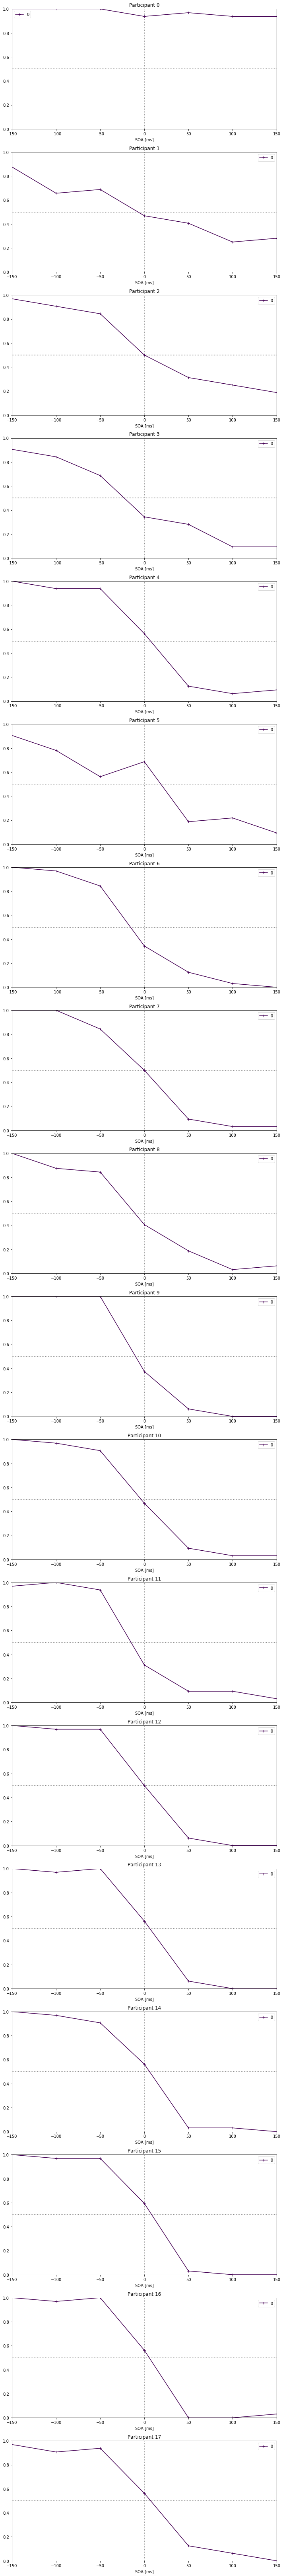

In [65]:
# Ploting
num_subjects = all_data['Participant'].nunique()
condition_names = all_data['Condition'].unique()

fig, axes = plt.subplots(nrows=num_subjects,
                         ncols=1,
                         figsize=(10,5*num_subjects))

# colors
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(condition_names)))

# so that code looks equal even for 1 subject
if num_subjects == 1:
        axes = [axes]

for i in range(num_subjects):
    subject_tojs = all_data.loc[all_data['Participant'] == i]

    axes[i].axhline(y=0.5, color='k', alpha=0.6, linestyle=':')
    axes[i].axvline(x=0, color='k', alpha=0.6, linestyle=':')

    for condition_id, condition_name in enumerate(condition_names):
        color = colors[condition_id]
        subject_tojs.loc[subject_tojs['Condition'] == condition_name].plot(
            x='SOA',
            y='Relative',
            ax=axes[i],
            label=condition_name,
            marker='+',
            c=color,
            )

    axes[i].set_ylim(0, 1)

    axes[i].set_xlabel('SOA [ms]')
    axes[i].set_title('Participant {0}'.format(i))

fig.tight_layout()

# Saving 
#fig.savefig('./results/raw-data-plot.png')
#fig.savefig('./results/raw-data-plot.svg')
fig.savefig('./results/raw-data-plot.pdf')

## Bayesian parameter estimation

The TVA interpretation of TOJ is based on the individual processing speed, $v_p$ and $v_r$ , (hazardrate of encoding) of each of the two stimuli. The overall processing capacity for the TOJ and the attentional advantage of probe can be reported in the derived mesures $C$ and $w$, respectively. Thus, a model ist constructed accordingly.

A hierarchical model is used to represent the sources of variance, person, SOA, repetition according to its logic. 

For understanding, why the model looks like this and how to develope your own models, we recommend Kruschke (2014). Although he uses R and JAGS or STAN, all his examples and code have been rebuild for python and pymc3. For this and more reimplementaitons of learning materials, see https://docs.pymc.io/learn.html 


In [84]:
import pymc3

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Psychometric functions
Functions by Jan Tünnermann (Tünnermann, Petersen & Scharlau, 2015). The reason that there are multiple functions is that one may be interested in increasing performance which might be possible by using *pf_tva_simple_toj_2*.

In [85]:
from theano.tensor import le,gt

def pf_tva_simple_toj(SOA, vp, vr):
    # SOA = np.array(SOA)
    left = (1-np.exp(-vp*np.abs(SOA))) + np.exp(-vp*abs(SOA)) * vp/(vp+vr)
    right = np.exp(-vr*np.abs(SOA))*vp/(vp+vr)
    return (le(SOA,0)*left + gt(SOA,0)*right)

# alternative version
def pf_tva_simple_toj_2(SOA, vp, vr):
    #SOA = np.array(SOA)
    left =  1-(np.exp(-vp*np.abs(SOA)) * vr/(vp+vr))
    right = np.exp(-vr*np.abs(SOA))*vp/(vp+vr)
    return (le(SOA,0)*left  + gt(SOA,0)*right)

def pf_tva_simple_toj_C_w(SOA, C, wp):
    vp = C*wp
    vr = C*(1-wp)
    left = (1-np.exp(-vp*abs(SOA))) + np.exp(-vp*abs(SOA)) * vp/(vp+vr)
    right = np.exp(-vr*abs(SOA))*vp/(vp+vr)
    return ((SOA<=0)*left  + (SOA>0)*right)

### Statistical hierarchical models to fit functions to data

The hierachical models are quite expensive in terms of computations. Thus, appearently minor changes in different implementations can effect the overall speed or success (if no starting values can be found) severely. These are, however, advanced considerations. A good source of help is stackexchange.

In [86]:
from theano.tensor import mean, cast, std

## Collection of Models

In [87]:
idx = all_data.Participant.get_values()
nidx = all_data.Participant.nunique()
SOA = all_data.SOA.get_values()
nSOA = all_data.SOA.nunique()
reps = all_data.Repetitions.get_values()
probe_first_count = all_data.Count.get_values()
cnd = all_data.Condition_number.get_values().astype(int)
ncnd = all_data.Condition_number.nunique()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is depre

In [88]:
model = pymc3.Model()
with model:
    C = pymc3.Uniform('C', 0.0, 0.25, shape=(len(set(idx)), len(set(cnd))))
    wp = pymc3.Uniform('wp', 0, 1, shape=(len(set(idx)), len(set(cnd))))
    theta = pymc3.Deterministic('theta',
                pf_tva_simple_toj_C_w(SOA, C[idx, cnd], wp[(idx, cnd)]))
    y = pymc3.Binomial('y', n=cast(reps, 'int64'), p=theta, observed=probe_first_count,dtype='int64')
    
    pymc3.Deterministic('mu_C', mean(C, axis=0) * 1000)
    pymc3.Deterministic('mu_wp', mean(wp, axis=0))
    pymc3.Deterministic('mu_delta_wp', mean(wp[:, 0:2] - wp[:, 2:4], axis=0))

    pymc3.Deterministic('sd_C', std(C, axis=0) * 1000)
    pymc3.Deterministic('sd_wp', std(wp, axis=0))
    pymc3.Deterministic('sd_delta_wp', std(wp[:, 0:2] - wp[:, 2:4], axis=0))
    
    # Differences between variables can be included if needed --- example:
    # pymc3.Deterministic('mu_delta_cond_0_1_C',mean(C[:,0] - C[:,1], axis=0)*1000)
    
    trace = pymc3.sample(5000)

/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [wp, C]
/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: 

### Hierarchical model implementation based on $v_p$ and $v_r$  (noncentralized) 

In [89]:
model = pymc3.Model()
with model:
    vp_mean = pymc3.Uniform('vp_mean',0.00, 0.2, shape=(ncnd))
    vp_sd = pymc3.HalfCauchy('vp_sd', beta = 0.01,  shape=(ncnd))
    vp_eta =  pymc3.Normal('vp_eta', mu = 0, sd = 1, shape=(nidx,ncnd))
    vp = pymc3.Deterministic('vp', vp_mean + vp_eta * vp_sd)
            
    vr_mean = pymc3.Uniform('vr_mean',0.00, 0.2, shape=(ncnd))
    vr_sd = pymc3.HalfCauchy('vr_sd', beta = 0.01,  shape=(ncnd))
    vr_eta =  pymc3.Normal('vr_eta', mu = 0, sd = 1, shape=(nidx,ncnd))
    vr = pymc3.Deterministic('vr', vr_mean + vr_eta * vr_sd)
            
    # How chance of report (theta) is affected by TVA parameters
    theta = pymc3.Deterministic('theta', pf_tva_simple_toj(SOA, 
                                vp[(idx,cnd)], 
                                vr[(idx,cnd)]))
    # How actual choice of response is dependent on theta
    y = pymc3.Binomial('y', n = reps, p = theta, 
                        observed=probe_first_count, shape=(len(idx)))
            
    # Derived measures
    v_diff = pymc3.Deterministic('v_diff', vp_mean - vr_mean)
    C_mean = pymc3.Deterministic('C_mean', vp_mean + vr_mean)
    wp_mean = pymc3.Deterministic('wp_mean', vp_mean / C_mean ) 

    trace = pymc3.sample(10000)

/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [vr_eta, vr_sd, vr_mean, vp_eta, vp_sd, vp_mean]
/home/bluk/.local/lib/python3.7/site-p

### Hierarchical model implementation based on $C$ and $\kappa$ as in Krüger, Tünnermann and Scharlau (2017)

In [106]:
model = pymc3.Model()
with model:        
    kappa_mean = pymc3.Normal('kappa_mean', mu= 2, sd = 1, shape=(ncnd))
    kappa_sd = pymc3.HalfCauchy('kappa_sd', beta = 1, shape=(ncnd))
    kappa_eta =  pymc3.Normal('kappa_eta', mu = 0, sd = 1, shape=(nidx,ncnd))

    C_mean = pymc3.Normal('C_mean', mu=0.05, sd = 0.02, shape=(ncnd))
    C_sd = pymc3.HalfCauchy('C_sd', beta = 0.01, shape=(ncnd))
    C_eta =  pymc3.Normal('C_eta', mu = 0, sd = 1, shape=(nidx,ncnd))
            
    vp = pymc3.Deterministic('vp', 
            (kappa_mean + kappa_eta * kappa_sd)/
            (1+((kappa_mean + kappa_eta * kappa_sd)) )
            * (C_mean + C_eta * C_sd))
    vr = pymc3.Deterministic('vr', 
            1/(1+((kappa_mean + kappa_eta * kappa_sd)) )
            * (C_mean + C_eta * C_sd))
  
            
    # How chance of report (theta) is affected by TVA parameters
    theta = pymc3.Deterministic('theta', pf_tva_simple_toj_2(SOA, 
                                vp[(idx,cnd)], 
                                vr[(idx,cnd)]))
            
    # How actual choice of response is dependent on theta
    y = pymc3.Binomial('y', n = reps, p = theta, 
            observed=probe_first_count, shape=(len(idx)))
            
    # Derived measures            
    vp_mean = pymc3.Deterministic('vp_mean', mean(vp, axis=0)) 
    vr_mean = pymc3.Deterministic('vr_mean', mean(vr, axis=0))
    v_diff = pymc3.Deterministic('v_diff', vp_mean - vr_mean)
                        
    trace = pymc3.sample(5000)

/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [C_eta, C_sd, C_mean, kappa_eta, kappa_sd, kappa_mean]
Sampling 3 chains, 0 divergences:   0%|          | 12/16500 [00:00<07:06, 38.70draws/s]/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differ

ParallelSamplingError: Bad initial energy

pick one of the above models

In [102]:
import os
import pickle
fitted_model = {'model': model, 'trace': trace, 'data': all_data}
pickle.dump(fitted_model, open('./results/model-trace-data.pickle', 'wb'))

## Results

#### Results as table
This is useful for diagnostics particularly the mc_error value should be low. 

In [103]:
summary_dataframe = pymc3.stats.summary(trace)
summary_dataframe.to_csv('./results/summary.csv')

/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


### Check qualitity of estimation

#### Results as traceplot
As described by John Kruschke traceplots should look like a smooth caterpillar---not like a skyline of skyscrapers

In [104]:
variable_names_traceplot = ['mu_C','mu_wp','sd_C','sd_wp']
#variable_names_traceplot = ['C_mean','wp_mean','vp_mean','vr_mean']
#variable_names_traceplot = ['C_mean','kappa_mean','vp_mean','vr_mean']
for var_name in variable_names_traceplot:
    pymc3.plots.traceplot(trace,var_names=[var_name])
    plt.savefig('./results/traceplot_{0}.png'.format(var_name))

/home/bluk/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


KeyError: "['mu_C'] var names are not present in dataset"

#### Autocorrelation plots

In [0]:
variable_names_traceplot = ['mu_C','mu_wp','sd_C','sd_wp']
#variable_names_traceplot = ['C_mean','wp_mean','vp_mean','vr_mean']
#variable_names_traceplot = ['C_mean','kappa_mean','vp_mean','vr_mean']
for var_name in variable_names_traceplot:
    pymc3.plots.autocorrplot(trace,var_names=[var_name])
    plt.savefig('./results/autocorrelation_{0}.png'.format(var_name))

### Plot Parameters 

#### Posterior Plots

plot vp and vr

In [0]:
fig, axes = plt.subplots(ncnd,1, figsize=(ncnd*5,10), sharex=True, sharey=True)

for i in range(ncnd):
    pymc3.plot_posterior(trace['mu_C'][:,i], ax=axes[i], kind = 'hist',figsize=(10,3))
    

In [0]:
fig, axes = plt.subplots(ncnd,1, figsize=(ncnd*5,10), sharex=True, sharey=True)

for i in range(ncnd):
    pymc3.plot_posterior(trace['mu_wp'][:,i], ax=axes[i], kind = 'hist',figsize=(10,3))

In [0]:
fig, axes = plt.subplots(mymodel.ncnd,2, figsize=(mymodel.ncnd*5,10), sharex=True, sharey=True)

for i in range(mymodel.ncnd):
    pymc3.plot_posterior(mymodel.trace['vp_mean'][:,i]*1000, ax=axes[i,0], kind = 'hist',figsize=(10,3))
    pymc3.plot_posterior(mymodel.trace['vr_mean'][:,i]*1000, ax=axes[i,1], kind = 'hist',figsize=(10,3))
    

plot C amd w

In [0]:
fig, axes = plt.subplots(mymodel.ncnd,1, figsize=(mymodel.ncnd*5,10), sharex=True, sharey=True)

for i in range(mymodel.ncnd):
    pymc3.plot_posterior(mymodel.trace['C_mean'][:,i]*1000, ax=axes[i], kind = 'hist',figsize=(10,3))    

In [0]:
fig, axes = plt.subplots(mymodel.ncnd,1, figsize=(mymodel.ncnd*5,10), sharex=True, sharey=True)

for i in range(mymodel.ncnd):
    #depends on whether attentional advantage is modeled as kappa or w_p
    #pymc3.plot_posterior(mymodel.trace['wp_mean'][:,i], ax=axes[i], kind = 'hist',figsize=(10,3),color='orange')
    pymc3.plot_posterior(mymodel.trace['kappa_mean'][:,i], ax=axes[i], kind = 'hist',figsize=(10,3),color='orange')

### Posterior Predictive
We have already shown that the model can be dreived from a theory. The quality of the model does, however, also depend on whether it fits the data. To this end, after fitting the model, model can predict the observed based on the parameter, the posterior predictive. Obviously, a high similarity of predicted data and data used to fit the model is expected. However, the data may have a certain shape that cannot be reproduced by the model. This is why Kruschke (2011) recomends to visually compare predicted and actual data after fitting. An example is provided in by Krüger, Tünnermann and Scharlau (2017) in the appendix.

In [0]:
ppc = pymc3.sample_posterior_predictive(mymodel.trace, samples=500, model=mymodel)

In [0]:
np.version.version

## List of Articles using TVA-TOJ analyses


Krüger, A., Tünnermann, J., & Scharlau, I. (2016). Fast and Conspicuous? Quantifying Salience With the Theory of Visual Attention. Advances in Cognitive Psychology, 12(1), 20–38. https://doi.org/10.5709/acp-0184-1

Krüger, A., Tünnermann, J., & Scharlau, I. (2017). Measuring and modeling salience with the theory of visual attention. Attention, Perception, & Psychophysics, 1–22. https://doi.org/10.3758/s13414-017-1325-6

Tünnermann, J., Petersen, A., & Scharlau, I. (2015). Does attention speed up processing? Decreases and increases of processing rates in visual prior entry. Journal of Vision, 15(3), 1. https://doi.org/10.1167/15.3.1

Tünnermann, J., & Scharlau, I. (2016). Peripheral Visual Cues: Their Fate in Processing and Effects on Attention and Temporal-Order Perception. Frontiers in Psychology, 7. https://doi.org/10.3389/fpsyg.2016.01442

Tünnermann, J., & Scharlau, I. (2018). Poking Left To Be Right? A Model-Based Analysis of Temporal Order Judged by Mice. Advances in Cognitive Psychology, 14. https://doi.org/10.5709/acp-0237-0

Tünnermann, J., Krüger, A., & Scharlau, I. (2017). Measuring Attention and Visual Processing Speed by Model-based Analysis of Temporal-order Judgments. JoVE (Journal of Visualized Experiments), (119), e54856–e54856. https://doi.org/10.3791/54856

Tünnermann, J., & Scharlau, I. (2018). Stuck on a Plateau? A Model-Based Approach to Fundamental Issues in Visual Temporal-Order Judgments. https://doi.org/10.20944/preprints201804.0213.v2


## References

Bundesen, C. (1990). A theory of visual attention. Psychological Review, 97(4), 523–547. https://doi.org/10.1037/0033-295X.97.4.523

Spence, C., & Parise, C. (2010). Prior-entry: A review. Consciousness and Cognition, 19(1), 364–379. https://doi.org/10.1016/j.concog.2009.12.001

Kruschke, J. K. (2011). Doing Bayesian Data Analysis: A Tutorial with R and BUGS. Academic Press.

Kuss, M., Jäkel, F., & Wichmann, F. A. (2005). Bayesian inference for psychometric functions. Journal of Vision, 5(5), 8. https://doi.org/10.1167/5.5.8

Wichmann, F. A., & Hill, N. J. (2001). The psychometric function: I. Fitting, sampling, and goodness of fit. Perception & Psychophysics, 63(8), 1293–1313.

Taagepera, R. (2008). Making Social Sciences More Scientific: The Need for Predictive Models: The Need for Predictive Models. OUP Oxford.

Weiß, K., & Scharlau, I. (2011). Simultaneity and temporal order perception: Different sides of the same coin? Evidence from a visual prior-entry study. The Quarterly Journal of Experimental Psychology, 64(2), 394–416. https://doi.org/10.1080/17470218.2010.495783

Shibuya, H., & Bundesen, C. (1988). Visual selection from multielement displays: Measuring and modeling effects of exposure duration. Journal of Experimental Psychology: Human Perception and Performance, 14(4), 591–600. https://doi.org/10.1037/0096-1523.14.4.591

Desimone, R., & Duncan, J. (1995). Neural Mechanisms of Selective Visual Attention. Annual Review of Neuroscience, 18(1), 193–222. https://doi.org/10.1146/annurev.ne.18.030195.001205

Nordfang, M., Staugaard, C., & Bundesen, C. (2017). Attentional weights in vision as products of spatial and nonspatial components. Psychonomic Bulletin & Review, 1–9. https://doi.org/10.3758/s13423-017-1337-1

Nordfang, M., Dyrholm, M., & Bundesen, C. (2013). Identifying bottom-up and top-down components of attentional weight by experimental analysis and computational modeling. Journal of Experimental Psychology. General, 142(2), 510–535. https://doi.org/10.1037/a0029631
